Author: Lia amalia

# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/DATA SET/loan_customer.csv')

In [10]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

pengamatan 

1. total 17 baris
2. tidak ada nilai eksrim pada data ini

In [11]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['loan_id', 'birth_date', 'dependents', 'aplication_income', 'coapplication_income', 'loan_amount', 'loan_term_month', 'loan_term_year','credit_history']
cats = ['jenis_kelamin', 'married', 'education', 'self_employed', 'property_type', 'has_credit_card','loan_status'] 

# Data Cleansing

## Handling missing values

In [12]:

#jumlah entry nul di setiap kolom 
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [13]:
#drop baris dengan missing value 
df=df.dropna()

In [14]:
#mengecek data sudah berhasil terdrop
df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [15]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

0

In [16]:
# drop duplicated rows
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


## Handling Outlier

In [17]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['applicant_income', 'loan_amount', 'credit_history', 'loan_term_year','coapplicant_income']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 52
Jumlah baris setelah memfilter outlier: 37


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 26 to 613
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             37 non-null     object 
 1   birth_date          37 non-null     object 
 2   phone_number        37 non-null     float64
 3   gender              37 non-null     object 
 4   married             37 non-null     object 
 5   dependents          37 non-null     object 
 6   education           37 non-null     object 
 7   self_employed       37 non-null     object 
 8   applicant_income    37 non-null     float64
 9   coapplicant_income  37 non-null     float64
 10  loan_amount         37 non-null     int64  
 11  loan_term_month     37 non-null     int64  
 12  loan_term_year      37 non-null     int64  
 13  credit_history      37 non-null     float64
 14  has_credit_card     37 non-null     object 
 15  property_type       37 non-null     object 
 16  loan_sta

In [19]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
31,LP001095,1983-09-21,6.281348e+11,Male,No,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT
43,LP001131,1986-11-09,6.287723e+10,Male,Yes,0,Graduate,No,3941.0,2336.0,134000,360,30,1.0,no,apartment,APPROVE


## Feature Encoding

In [20]:
# pengecekan nilai/entri dari kolom-kolom kategorikal
cats_updated = cats = ['gender', 'married', 'education', 'self_employed', 'property_type', 'has_credit_card','loan_status']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column gender
Male      30
Female     7
Name: gender, dtype: int64
------------------------------ 

value counts of column married
Yes    23
No     14
Name: married, dtype: int64
------------------------------ 

value counts of column education
Graduate        26
Not Graduate    11
Name: education, dtype: int64
------------------------------ 

value counts of column self_employed
No     30
Yes     7
Name: self_employed, dtype: int64
------------------------------ 

value counts of column property_type
apartment    18
house        11
studio        8
Name: property_type, dtype: int64
------------------------------ 

value counts of column has_credit_card
no     22
yes    15
Name: has_credit_card, dtype: int64
------------------------------ 

value counts of column loan_status
APPROVE    31
REJECT      6
Name: loan_status, dtype: int64
------------------------------ 



In [ ]:
#label encoding
mapping_married = {
    'Yes' : 0,
    'No' : 1
}
mapping_education = {
    'Graduate' : 0,
    'Not Graduate' : 1
}
mapping_self_employed = {
    'Yes' : 0,
    'No' : 1
}

mapping_property_type = {
    'house' : 0,
    'studio' : 1,
    'apartment' : 2  
}

df['married'] = df ['married'].map(mapping_married)
df['education'] = df ['education'].map(mapping_education)
df['self_employed'] = df ['self_employed'].map(mapping_self_employed)
df['property_type'] = df ['property_type'].map(mapping_property_type)


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['married_N'] = labelencoder.fit_transform(df['married'])
df['education_N'] = labelencoder.fit_transform(df['education'])
df['self_employed_N'] = labelencoder.fit_transform(df['self_employed'])
df['property_type_N'] = labelencoder.fit_transform(df['property_type'])
df['gender_N'] = labelencoder.fit_transform(df['gender'])
df['loan_status_N'] = labelencoder.fit_transform(df['loan_status'])

df = df.drop('married', 1)
df = df.drop('education', 1)
df = df.drop('self_employed', 1)
df = df.drop('property_type', 1)
df = df.drop('gender', 1)
df = df.drop('loan_status', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of Dat

In [ ]:
df.head ()

,loan_id,birth_date,phone_number,dependents,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,married_N,education_N,self_employed_N,property_type_N,gender_N,loan_status_N
26,LP001068,1986-09-10,6.281377e+11,0,2799.0,2253.0,122000,360,30,1.0,no,0,0,1,2,1,0
27,LP001073,1989-02-05,6.281346e+11,2,4226.0,1040.0,110000,360,30,1.0,yes,0,1,1,0,1,0
28,LP001086,1978-11-21,6.285222e+10,0,1442.0,0.0,35000,360,30,1.0,no,1,1,1,0,1,1
31,LP001095,1983-09-21,6.281348e+11,0,3167.0,0.0,74000,360,30,1.0,yes,1,0,1,0,1,1
43,LP001131,1986-11-09,6.287723e+10,0,3941.0,2336.0,134000,360,30,1.0,no,0,0,1,2,1,0


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [ ]:
df.info

<bound method DataFrame.info of       loan_id  birth_date  ...  gender_N loan_status_N
26   LP001068  1986-09-10  ...         1             0
27   LP001073  1989-02-05  ...         1             0
28   LP001086  1978-11-21  ...         1             1
31   LP001095  1983-09-21  ...         1             1
43   LP001131  1986-11-09  ...         1             0
47   LP001144  1984-08-31  ...         1             0
81   LP001266  1984-08-05  ...         1             0
90   LP001310  1987-10-18  ...         1             0
93   LP001319  1985-04-18  ...         1             0
114  LP001392  1986-03-28  ...         0             0
144  LP001507  1984-03-29  ...         1             0
146  LP001514  1981-10-20  ...         0             0
149  LP001519  1980-12-02  ...         0             1
153  LP001531  1981-08-23  ...         1             1
206  LP001692  1991-02-21  ...         0             0
208  LP001698  1985-07-28  ...         1             0
209  LP001699  1980-06-24  ...   

In [ ]:
df.groupby(['gender_N', 'property_type_N'])["property_type_N"].count()

gender_N  property_type_N
0         0                   1
          1                   2
          2                   4
1         0                  10
          1                   6
          2                  14
Name: property_type_N, dtype: int64

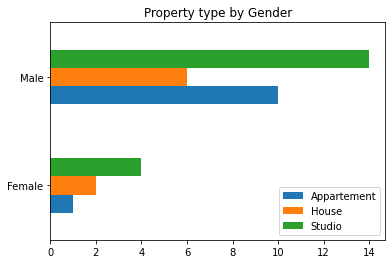

In [ ]:
Appartement = [1,10]
House = [2,6]
Studio = [4,14]

index     = ["Female", "Male"];


df = pd.DataFrame({'Appartement': Appartement,
                   'House': House, 
                   'Studio' : Studio}, index=index)
ax = df.plot.barh(title = "Property type by Gender")

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [ ]:
df.groupby(['married_N', 'loan_term_year'])["loan_term_year"].count()

married_N  loan_term_year
0          30                23
1          30                14
Name: loan_term_year, dtype: int64

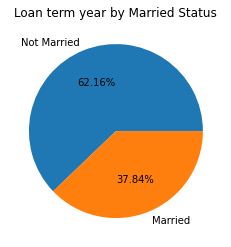

In [ ]:
import matplotlib.pyplot as plt

y = np.array([23,14])
mylabels = ["Not Married", "Married"]

plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.title ("Loan term year by Married Status")
plt.show() 

In [ ]:
df.groupby(['married_N', 'loan_status_N'])["loan_status_N"].count()

married_N  loan_status_N
0          0                23
1          0                 8
           1                 6
Name: loan_status_N, dtype: int64

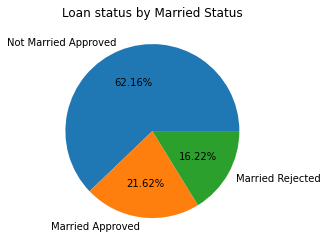

In [ ]:
import matplotlib.pyplot as plt

y = np.array([23, 8, 6])
mylabels = ["Not Married Approved", "Married Approved", "Married Rejected"]

plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.title ("Loan status by Married Status")
plt.show() 

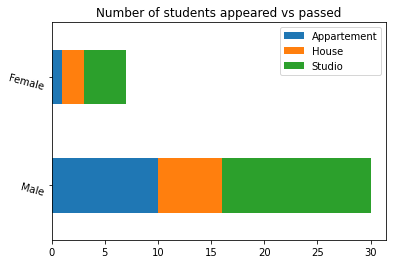

In [ ]:
# # Example Python program to plot a stacked horizontal bar chart 

import pandas as pd

import matplotlib.pyplot as plot

 

# A python dictionary

data = {"Appartement":[10,1],
        "House":[6,2],
        "Studio":[14,4] };

index     = ["Male", "Female"];

 

# Python Dictionary loaded into a DataFrame

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a stacked horizontal bar chart

dataFrame.plot.barh(stacked=True,rot=-15, title="Number of students appeared vs passed");

plot.show(block=True);

ValueError: ignored

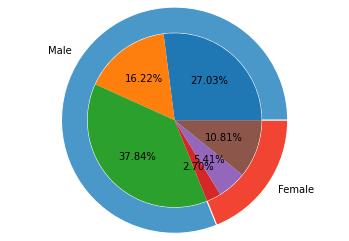

In [ ]:
import matplotlib.pyplot as plt

# Make data: I have 3 groups and 7 subgroups
group_names=['Male', 'Female']
group_size=[30,7]
subgroup_names=['Appart', 'House', 'studio', 'Appart', 'House', 'studio']
subgroup_size=[10,6,14,1,2,4]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= 
[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Insi
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, autopct='%1.2f%%')
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

subgroup_names_legs=['A.1:a1desc', 'A.2:a2desc', 'A.3:a3desc', 
'B.1:b1desc', 'B.2:b2desc', 'C.1:c1desc', 'C.2:c2desc', 'C.3:c3desc', 
'C.4:c4desc', 'C.5:c5desc']
plt.legend(subgroup_names_legs,loc='best')

In [ ]:
print ["hello word"]

TypeError: ignored